# Lab1.1: Using random variates to fit a Gaussian

The script will allow us to read in data, convert it to a frequency histogram and fit the histogram with a Gaussian function.

The first function is the conventional statistical gaussian function with input parameters mean and standard deviations that outputs the probability distribution function (y) as a function of the variable value (x).

$$y= \frac{1}{\sigma\sqrt{2\pi }}\exp^{-(x-\mu)^2/2\sigma^2}$$

This will be used to estimate $\sigma$ and from there the Diffusion coefficient. From the value of D you will then calculate the $N_A$.



In [1]:
#Define your gaussian (statistical)
def gaussian(x, mu, sigma):
    y = 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2))
    return y

The second function is maps the gaussian to the Diffusion problem and has 2 inputs: diffusion coeffcient (D) and time (t), which then plots the likelihood of a displacement (p(x)) as a function of the displacement (x).

In [2]:
def gaussianDiffus(x, t, D):
    y = (1/np.sqrt(4*np.pi * D *t)) * np.exp( - (x**2) / (4 *D*t))
    return y

### Testing the code
We give some values to the gaussian function, allow it to calculate random variables, then fit it to a smooth function and compare the fit estimates to the input.
### Input variables
Standard deviation:  $\sigma$=2

Mean:  $\mu$ =0

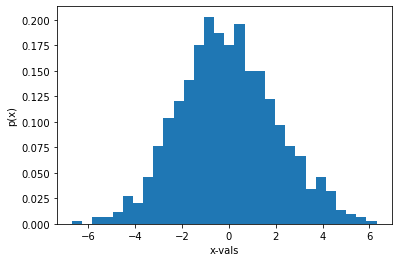

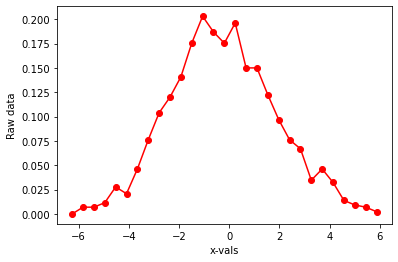

In [3]:
import pylab as plt
import numpy as np
from scipy.optimize import curve_fit

m1= 0
s1=2
#create a dummy dataset using (here an inbuilt normal random variate) given a mu and sigma
s = np.random.normal(m1, s1, 1000)
#s = np.random.uniform(m1, s1, 1000)

#Define your gaussian (diffusion derived)
#def diffgauss(x, D, sigma):
#    return 1/(np.sqrt(4 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2)


#verifying the distribution is normal
abs(m1 - np.mean(s))  < 0.01
#std dev
abs(s1 - np.std(s, ddof=1))  < 0.01
#output the counts, bins and optional values
count, bins, ignored = plt.hist(s, 30, density=True)
#plt.plot(bins,gaussian(bins, m1, s1))
plt.xlabel('x-vals')
plt.ylabel('p(x)')
plt.show()

#plt.hist(y2, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
xTst= bins[1:30]
yTst = count[1:30]
plt.plot(xTst,yTst,'-or')
plt.xlabel('x-vals')
plt.ylabel('Raw data')
plt.show()



The random numbers generated by a Python function (as a demonstration), show how an input random normal set of datapoints can be fit to a gaussian and the parameters of the fit gaussian recovered. 

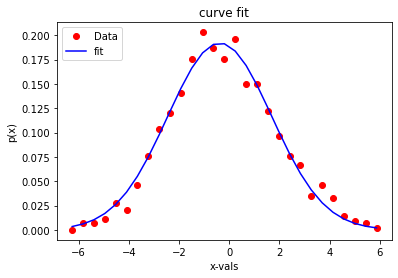

[-0.3785565842357954, 2.0780025914546507]

In [4]:
#the dummy data, with some noise thrown in
popt, pcov = curve_fit(gaussian, xTst, yTst)
#print popt.size
#print pcov.size
plt.plot(xTst,yTst,'or',label='Data')
#repolot it with the fit
f1=plt.plot(xTst, gaussian(xTst,popt[0],popt[1]),'-b',label='fit')
plt.title('curve fit')
plt.xlabel('x-vals')
plt.ylabel('p(x)')
plt.legend(loc='upper left')
plt.show()
[popt[0], popt[1]]

This final step of extracting $\mu$ and $\sigma$ will allow you to estimate the value of D which you require for solving the problem of estimating $N_A$.

# Lab1.2: Exp data

In [11]:
import pandas as pd

In [18]:
from IPython.display import HTML
def returnXYdiff(df):
    n_frames = df['Track'].unique()
    Xdiff=[]
    Ydiff=[]
    for n in n_frames:
        xy = df[df['Track']==n]
        xf = xy.diff()
        for index, row in xf.iterrows():
            if index > 0:
                Xdiff.append(row['X'])
                Ydiff.append(row['Y'])
    return Xdiff, Ydiff

In [13]:
track_data = pd.read_csv("track.csv")
track_data.head()
xdel, ydel = returnXYdiff(track_data)

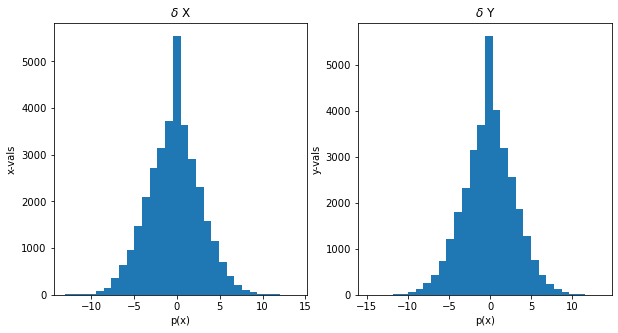

In [14]:
fig,ax= plt.subplots(1,2, figsize=(10,5))

count, bins, ignored = ax[0].hist(xdel, 30)
#plt.plot(bins,gaussian(bins, m1, s1))
ax[0].set_xlabel('p(x)')
ax[0].set_ylabel('x-vals')
ax[0].set_title('$\delta$ X')

count, bins, ignored = ax[1].hist(ydel, 30)
#plt.plot(bins,gaussian(bins, m1, s1))
ax[1].set_xlabel('p(x)')
ax[1].set_ylabel('y-vals')
ax[1].set_title('$\delta$ Y')
plt.show()
